# MPG

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('pandas version: ', pd.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', matplotlib.__version__)

pandas version:  2.3.3
seaborn version:  0.13.2
matplotlib version:  3.10.7


In [2]:
df = sns.load_dataset("mpg")
df.dropna(inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Votre mission 🕵🏻‍♂️🕵🏻‍♀️

1. Quelles sont les variables discrètes et continues de ce dataset ?

2. Analysez la variable mpg.

- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)

- Tracez les 2 graphiques utiles pour cette variable

3. Analysez la variable "cylinders"

4. Analysez la variable "origin"

5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)

- Que semble-t-on voir ?

- Rajoutez-y la variable de l'année du modèle. Que voit-on ?

6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.

- Que semble-t-on voir ?

- Voit-on également cela pour les autres pays ?

7. Analysez la relation entre le nombre de cylindres et l'année du modèle.

- Se dégage-t'il quelque chose de cette analyse ?

8. Analysez la relation entre le nombre de cylindres et l'origine.

- Se dégage-t'il quelque chose de cette analyse ?

9. Quelle est l'accélération moyenne des voitures des différents pays ?

10. Quelle est-elle pour les modèles de l'année 80 ?

11. Au final Il semblerait qu'une tendance se dégage à travers le temps...

- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes

### 1. Quelles sont les variables discrètes et continues de ce dataset ?

Les variables discrètes sont : cylinders, origin, name, model_year

Les variables continues sont : mpg, displacement, horsepower, weight, acceleration

### 2. Analysez la variable mpg.

- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)

- Tracez les 2 graphiques utiles pour cette variable


In [3]:
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

La moyenne de mpg est de 23 "miles per gallon" pour toutes voitures confondues dans le dataset. 

<Axes: xlabel='mpg'>

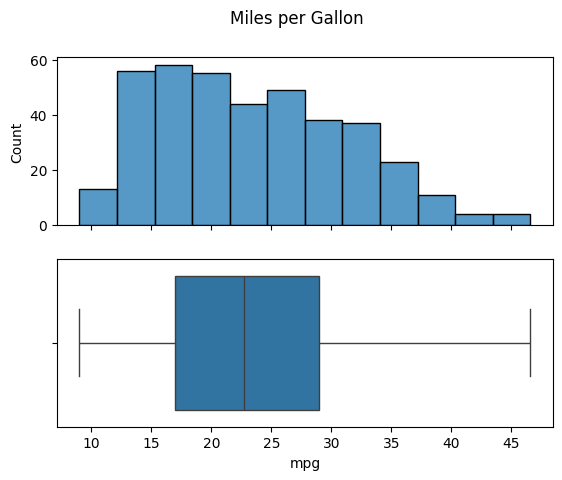

In [4]:
fig, ax= plt.subplots(2, 1, sharex=True)
plt.suptitle('Miles per Gallon')
sns.histplot(df, x='mpg', ax = ax[0])
sns.boxplot(df, x='mpg', ax = ax[1])

### 3. Analysez la variable "cylinders"

In [8]:
df['cylinders'].describe()

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

<Axes: xlabel='cylinders', ylabel='count'>

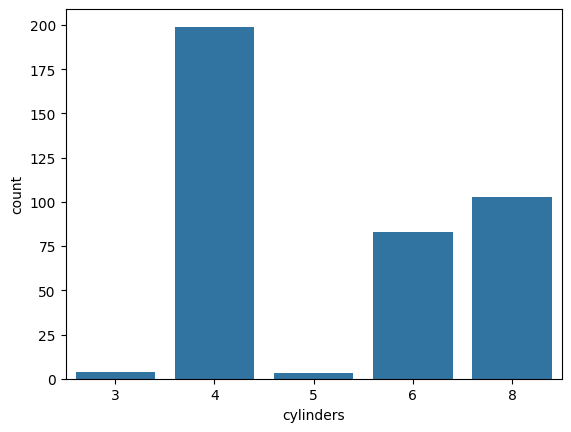

In [7]:
sns.countplot(data=df, x=df['cylinders'])

Le dataset est représenté majoritairement par des voitures ayant 4 cylindres.

De plus, nous observons que le nombre de cylindre d'une voiture varie entre 3 et 8 ici.

### 4. Analysez la variable "origin"

<Axes: xlabel='origin', ylabel='count'>

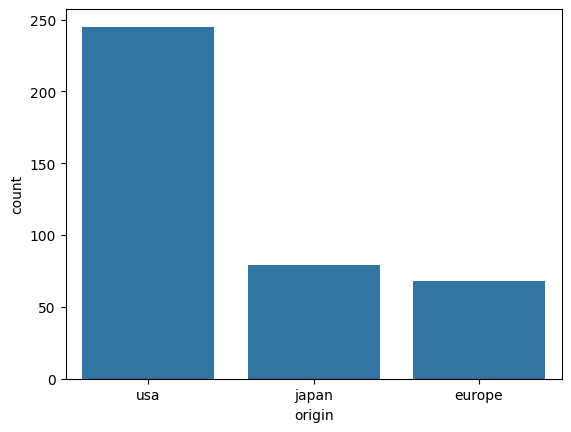

In [10]:
sns.countplot(data=df, x=df['origin'])

Les voitures sont majoritairement en provenance des USA, ensuite du Japon et enfin l'Europe.

### 5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)

- Que semble-t-on voir ?
- Rajoutez-y la variable de l'année du modèle. Que voit-on ?

<Axes: xlabel='mpg', ylabel='horsepower'>

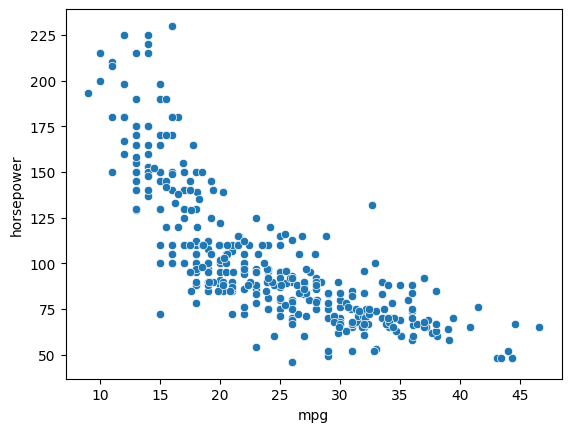

In [11]:
sns.scatterplot(data=df, x=df['mpg'], y=df['horsepower'])

On semble observer ici une relation linéaire négative entre mpg et horsepower. En effet, plus une voiture est puissante (plus elle a de chevaux), moins elle arrivera à parcourir de "miles per gallon".

In [17]:
subset_corr_df = df[['mpg', 'horsepower']]
subset_corr_df.corr()


,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


<Axes: xlabel='mpg', ylabel='horsepower'>

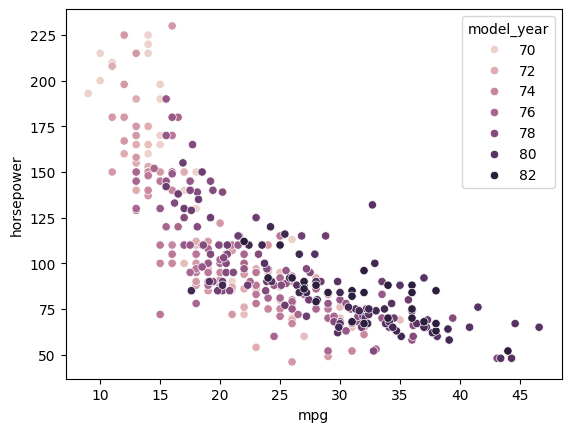

In [19]:
sns.scatterplot(data=df, x=df['mpg'], y=df['horsepower'], hue=df['model_year'])

En rajoutant l'année du modèle de la voiture, on voit que les modèles les plus anciens sont ceux qui sont les plus puissants et qu'ils consommeraient également le plus car ils font moins de kilomètres que les modèles plus récents.

### 6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.

- Que semble-t-on voir ?

- Voit-on également cela pour les autres pays ?

<Axes: xlabel='model_year', ylabel='weight'>

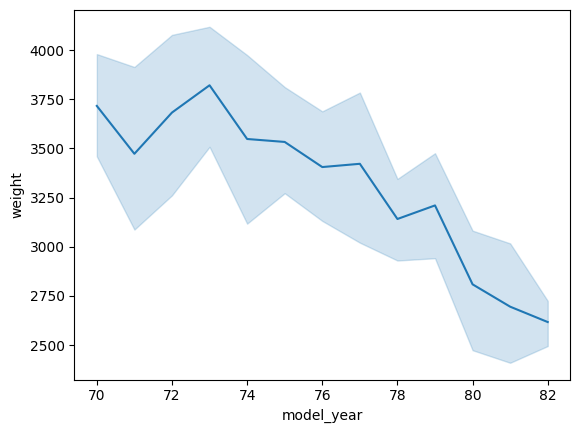

In [25]:
usa_df = df[df['origin'] == 'usa'].sort_values(by='model_year')
usa_df
sns.lineplot(data=usa_df, x=usa_df['model_year'], y=usa_df['weight'])

Au fil du temps, entre les années 70 et 82,  aux USA, le poids des voitures semblent diminuer. 

<Axes: xlabel='model_year', ylabel='weight'>

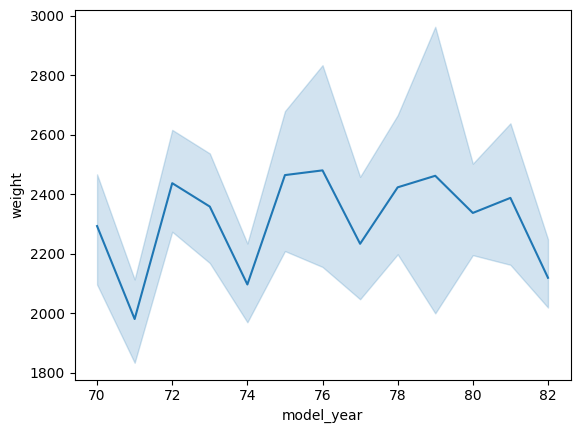

In [26]:
not_usa_df = df[df['origin'] != 'usa'].sort_values(by='model_year')
not_usa_df
sns.lineplot(data=not_usa_df, x=not_usa_df['model_year'], y=not_usa_df['weight'])

<Axes: xlabel='model_year', ylabel='weight'>

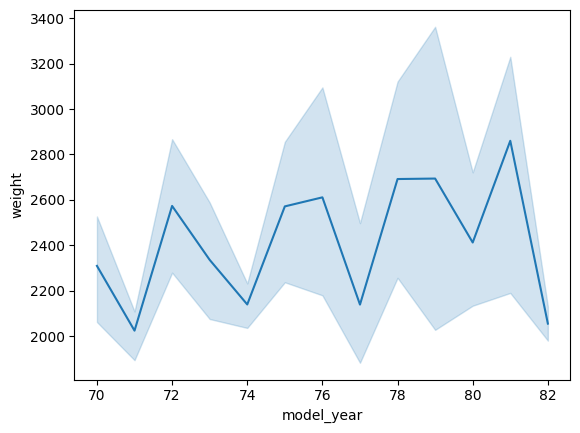

In [27]:
eu_df = df[df['origin'] == 'europe'].sort_values(by='model_year')
eu_df
sns.lineplot(data=eu_df, x=eu_df['model_year'], y=eu_df['weight'])

<Axes: xlabel='model_year', ylabel='weight'>

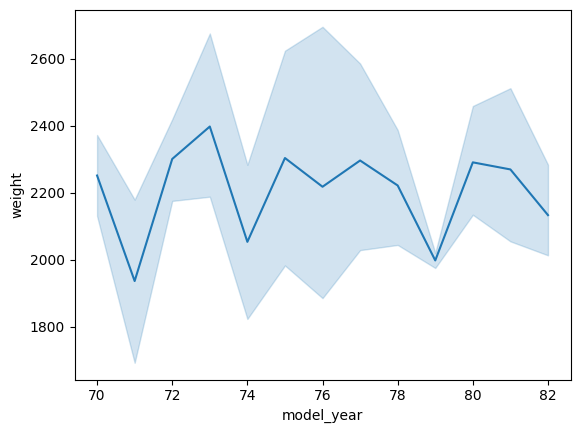

In [28]:
jap_df = df[df['origin'] == 'japan'].sort_values(by='model_year')
jap_df
sns.lineplot(data=jap_df, x=jap_df['model_year'], y=jap_df['weight'])

Au Japon comme en Europe, le poids des voitures semble être assez stable entre les années 70 et 82.
De plus, le poids max aux USA est de 4T alors qu'au Japon comme en Europe, il ne semble jamais avoir dépassé les 2T4.